In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp
import warnings
warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True

In [62]:
def my_plot(f,const,s0,t0,tf,topic,topic1):
    T = np.linspace(t0, tf, 5000)
    soln = solve_ivp(f,[t0, tf], s0, args=const,dense_output=True)
    X,Y,Z = soln.sol(T)
    fig = plt.figure(figsize=(28,16))
    fig.suptitle(topic+'\n'+topic1+'\n', fontsize=30,y=1.)
    gs=fig.add_gridspec(4,5)
    ax1=fig.add_subplot(gs[:,3:],projection='3d')
    ax2=fig.add_subplot(gs[0,0:2])
    ax3=fig.add_subplot(gs[1,0:2])
    ax4=fig.add_subplot(gs[2,0:2])
    ax5=fig.add_subplot(gs[0,2])
    ax6=fig.add_subplot(gs[1,2])
    ax7=fig.add_subplot(gs[2,2])
    ax1.xaxis.set_pane_color((1,1,1,1))
    ax1.yaxis.set_pane_color((1,1,1,1))
    ax1.zaxis.set_pane_color((1,1,1,1))
    ax1.xaxis.pane.set_edgecolor('w')
    ax1.yaxis.pane.set_edgecolor('w')
    ax1.zaxis.pane.set_edgecolor('w')
    ax1.grid(False)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax5.set_xlabel('x')
    ax5.set_ylabel('y')
    ax6.set_xlabel('y')
    ax6.set_ylabel('z')
    ax7.set_xlabel('x')
    ax7.set_ylabel('z')
    s = 10
    n = 10000
    for i in range(0,n-s,s):
        ax1.plot(X[i:i+s+1], Y[i:i+s+1], Z[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
        ax2.plot(T,X,'g', linewidth=0.5)
        ax3.plot(T,Y,'r', linewidth=0.7)
        ax4.plot(T,Z,'b', linewidth=0.5)
        ax5.plot(X[i:i+s+1],Y[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
        ax6.plot(Y[i:i+s+1],Z[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
        ax7.plot(X[i:i+s+1],Z[i:i+s+1],color=plt.cm.hsv((i+1)/n), linewidth=0.5)
    ax2.legend(['x'],fontsize=9)
    ax3.legend(['y'],fontsize=9)
    ax4.legend(['z'],fontsize=9)
    plt.savefig('{}.jpg'.format(topic),dpi=600)
    plt.show()

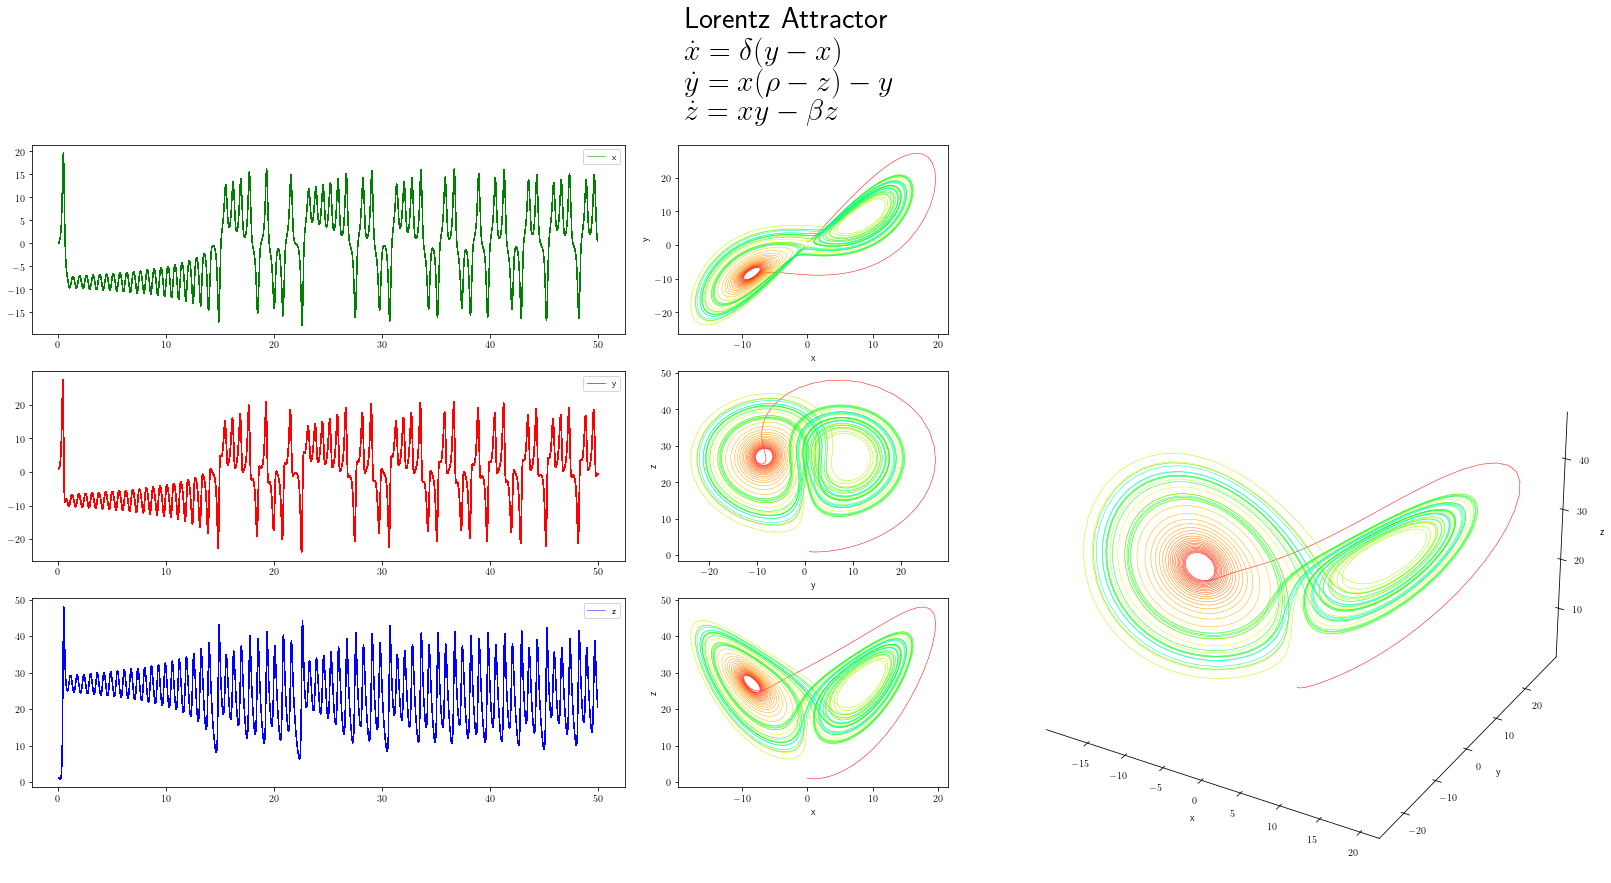

In [63]:
def my_lorenz(t, S, sigma, rho, beta):
    x,y,z=S
    dx=sigma*(y-x)
    dy=x*(rho-z)-y
    dz=x*y-beta*z
    dS=np.array([dx,dy,dz])
    return dS

sigma = 10
rho = 28
beta = 8/3
const=(sigma, rho, beta)

t0 = 0.1
tf = 50
s0 = np.array([0, 1, 1.05])
my_plot(my_lorenz,const,s0,t0,tf,'Lorentz Attractor',
        r'$ \\ \dot{x}= \delta(y-x)  \\ \dot{y}= x(\rho-z)-y \\ \dot{z}=xy-{\beta z} $')

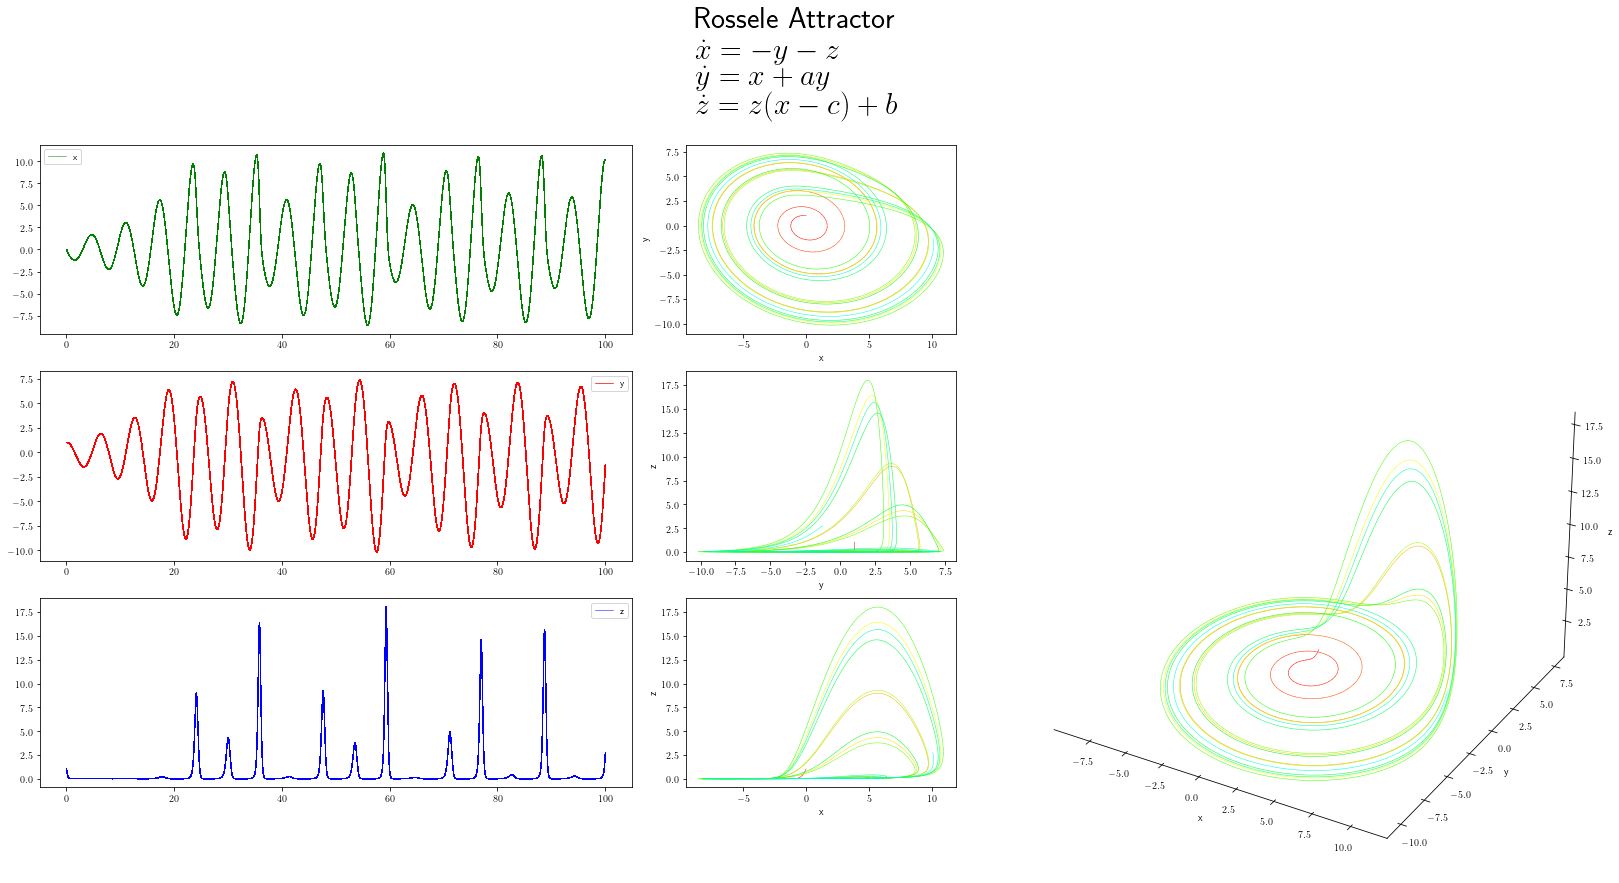

In [4]:
def my_rosseler(t, S, a,b,c):
    x, y, z = S
    dx_dt = -y-z
    dy_dt = x+a*y
    dz_dt = b+z*(x-c)
    dS=np.array([dx_dt, dy_dt, dz_dt])
    return dS

a,b,c=0.2,0.2,5.7
const=(a,b,c)
t0 = 0.1
tf = 100
s0 = np.array([0, 1, 1.05])
my_plot(my_rosseler,const,s0,t0,tf,'Rossele Attractor',
        r'$ \\ \dot{x}= -y-z  \\ \dot{y}= x+ay \\ \dot{z}= z(x- c)+b $')

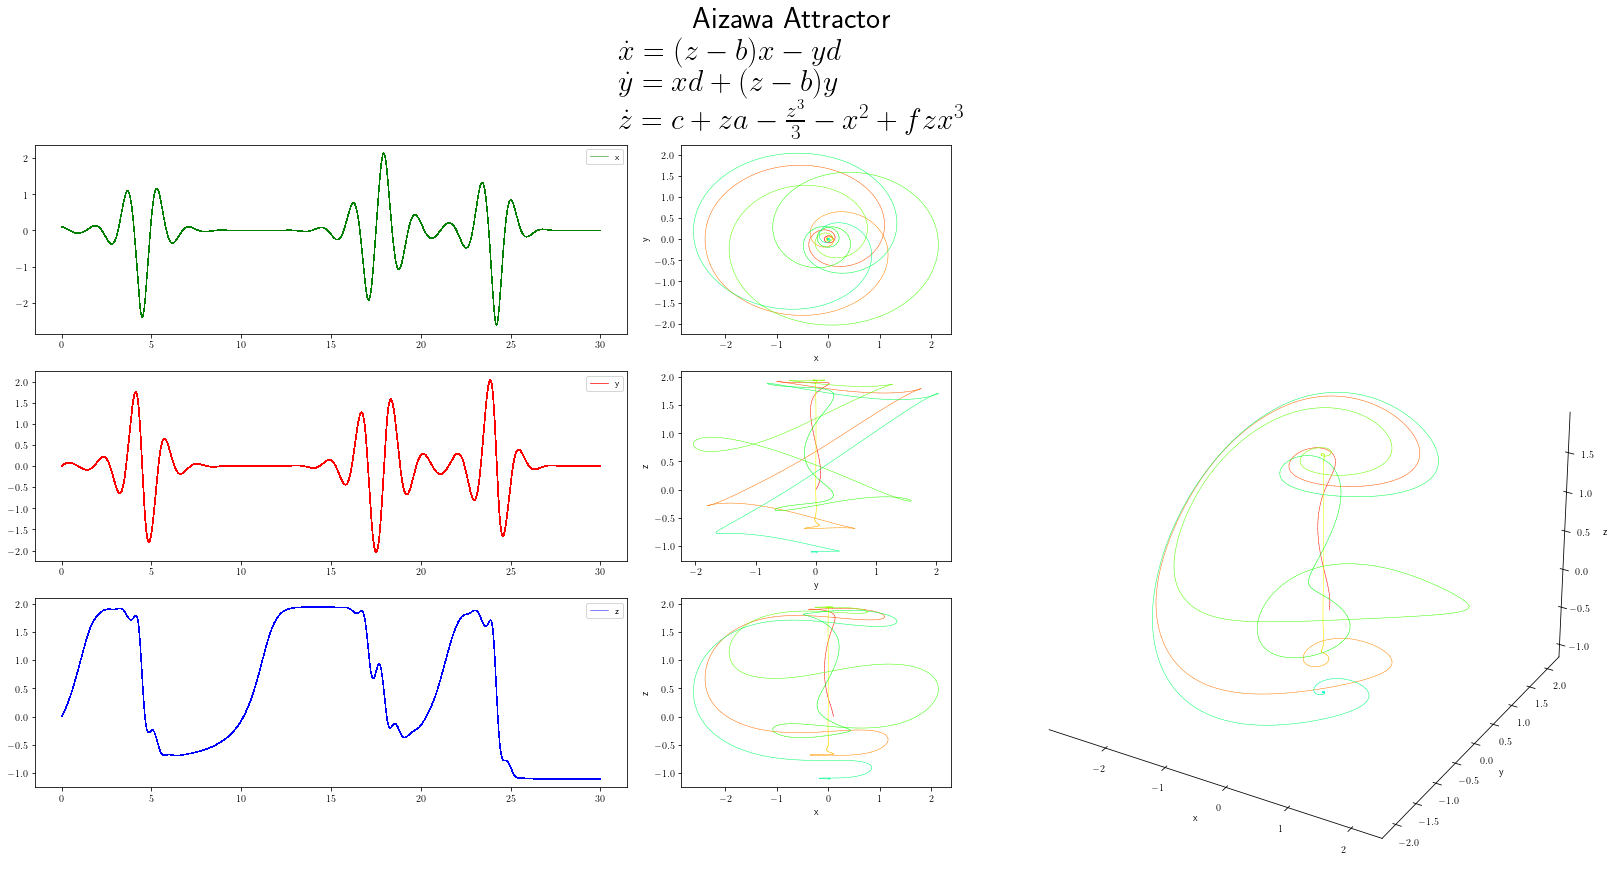

In [5]:
def my_aizawa(t,S,a,b,c,d,e,f):
    x, y, z = S
    dx_dt = (z-b)*x-d*y
    dy_dt = d*x+(z-b)*y
    dz_dt = c+(a*z)-(z*z*z/3)-(x*x)+(f*z*x*x*x)
    dS = np.array([dx_dt, dy_dt, dz_dt])
    return dS

a,b,c,d,e,f=0.95,0.7,0.6,3.5,0.25,0.1
const=(a,b,c,d,e,f)

t0 = 0
tf = 30
s0 = np.array([0.1, 0., 0.])
my_plot(my_aizawa,const,s0,t0,tf,'Aizawa Attractor',
 r'$ \\ \dot{x}= (z-b)x-yd \\ \dot{y}=xd+(z-b)y \\ \dot{z}=c+za-\frac{z^3}{3}-x^2+fzx^3$')

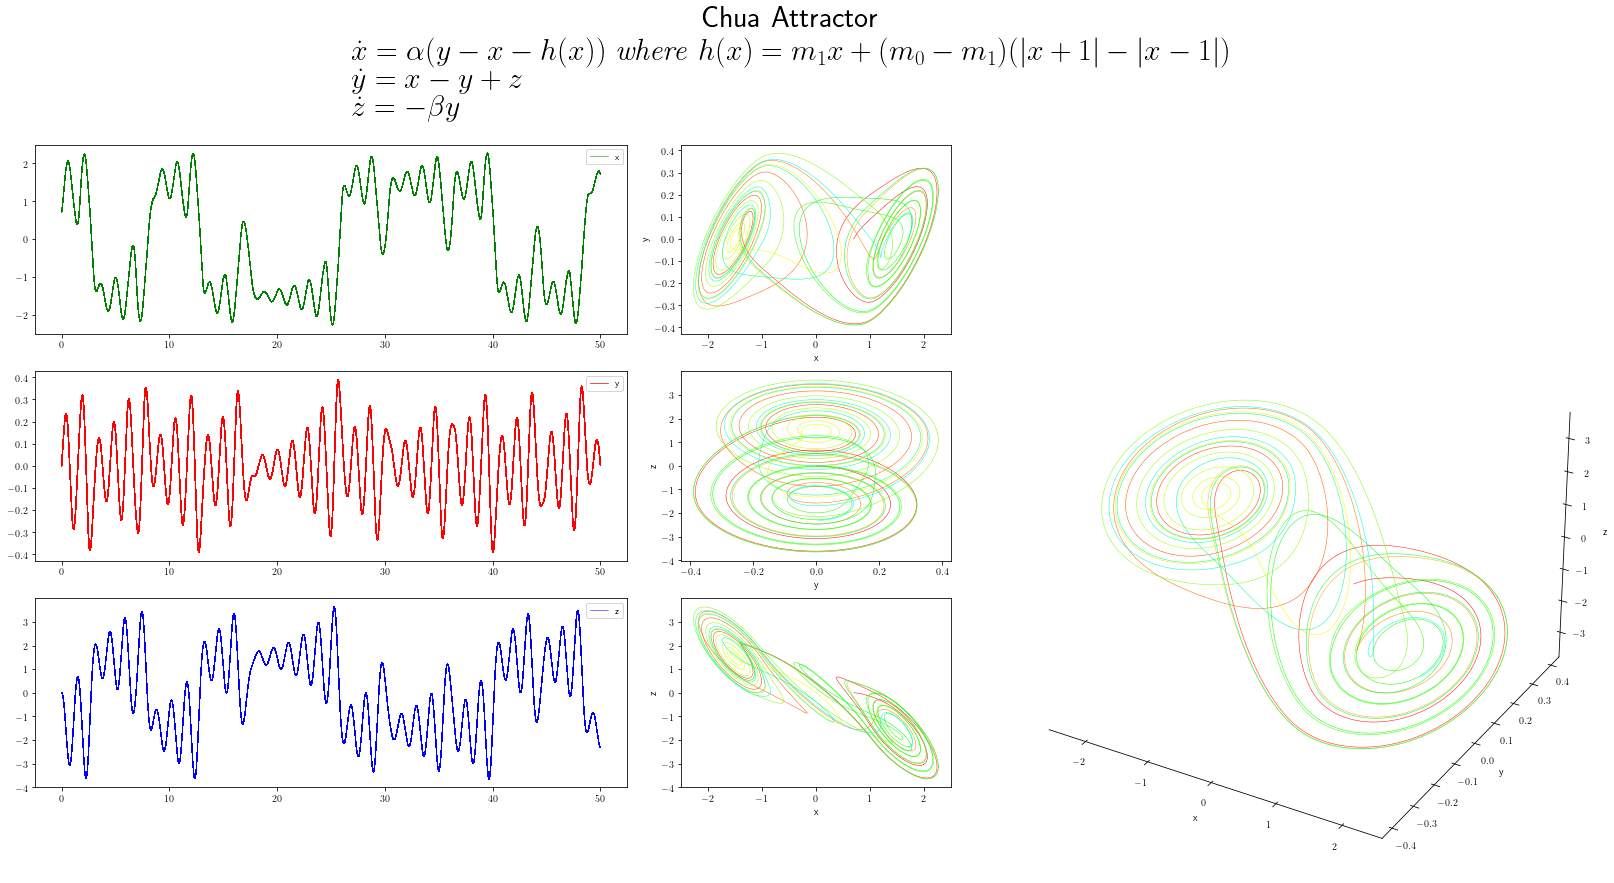

In [13]:
def my_aizawa(t,S,m0,m1,alpha,beta):
    x, y, z = S
    h = lambda x: m1 * x + ( (m0 - m1) * (abs(x + 1) - abs(x - 1)) / 2)
    dx_dt = alpha*(y-x-h(x))
    dy_dt = x-y+z
    dz_dt = -beta*y
    dS = np.array([dx_dt, dy_dt, dz_dt])
    return dS

m0,m1,alpha,beta = -8/7, -5/7, 15.6, 28
const=(m0,m1,alpha,beta)

t0 = 0
tf = 50
s0 = np.array([0.7, 0.0, 0.0])
my_plot(my_aizawa,const,s0,t0,tf,'Chua Attractor', 
 r'$ \\ \dot{x}= \alpha(y-x-h(x)) \ \mathit{where} \ h(x)=m_1x+(m_0-m_1)(|x+1|-|x-1|) $'+
        r'$ \\ \dot{y}=x-y+z \\ \dot{z}=-\beta y   $')

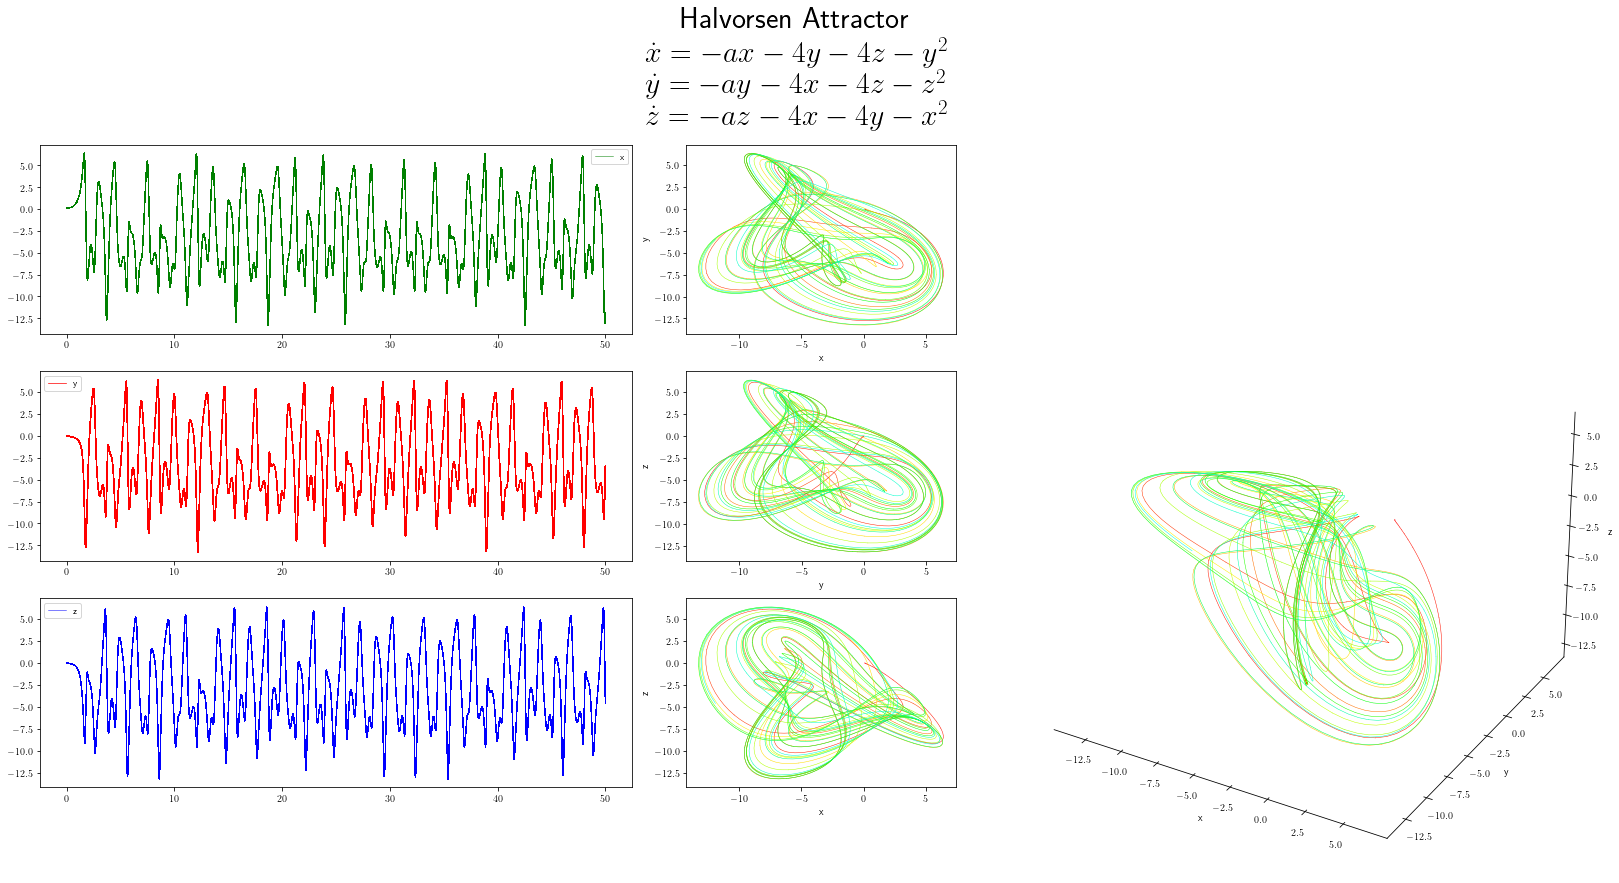

In [24]:
def my_halvorsen(t,S,a):
    x, y, z = S
    dx_dt = -(a*x)-(4*y)-(4*z)-(y*y)
    dy_dt = -(a*y)-(4*x)-(4*z)-(z*z)
    dz_dt = -(a*z)-(4*x)-(4*y)-(x*x)
    dS = np.array([dx_dt, dy_dt, dz_dt])
    return dS

a=1.4
const=(a,)

t0 = 0.
tf = 50
s0 = np.array([0.1, 0.0, 0.0])
my_plot(my_halvorsen,const,s0,t0,tf,'Halvorsen Attractor', 
 r'$ \\ \dot{x} = -ax-4y-4z-y^2 \\ \dot{y} = -ay-4x-4z-z^2 \\ \dot{z} = -az-4x-4y-x^2 $')

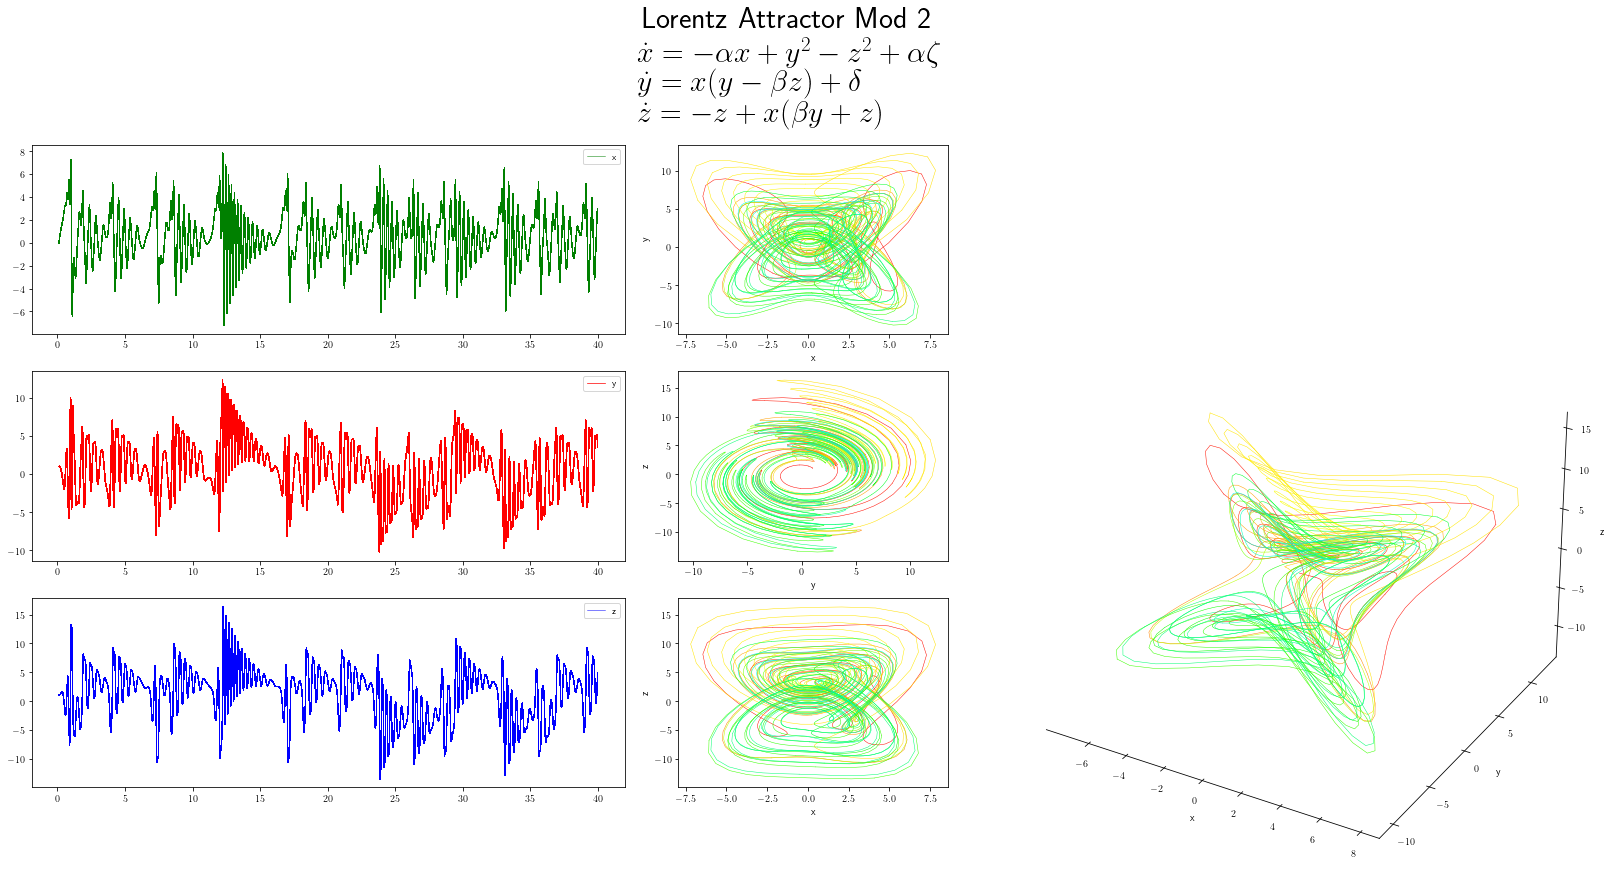

In [36]:
def my_lorenzmod2(t, S, alpha, beta, zeta, delta):
    x,y,z=S
    dx=-alpha*x+y**2-z**2+alpha*zeta
    dy=x*(y-beta*z)+delta
    dz=-z+x*(beta*y+z)
    dS=np.array([dx,dy,dz])
    return dS

alpha = 0.9
beta = 5
zeta = 9.9
delta = 1
const=(alpha, beta, zeta, delta)

t0 = 0.1
tf = 40
s0 = np.array([0, 1, 1.05])
my_plot(my_lorenzmod2,const,s0,t0,tf,'Lorentz Attractor Mod 2',
        r'$ \\ \dot{x}= -\alpha x+y^2-z^2+\alpha\zeta $'+
        r'$ \\ \dot{y}= x(y-\beta z)+\delta \\ \dot{z}=-z+x(\beta y +z) $')

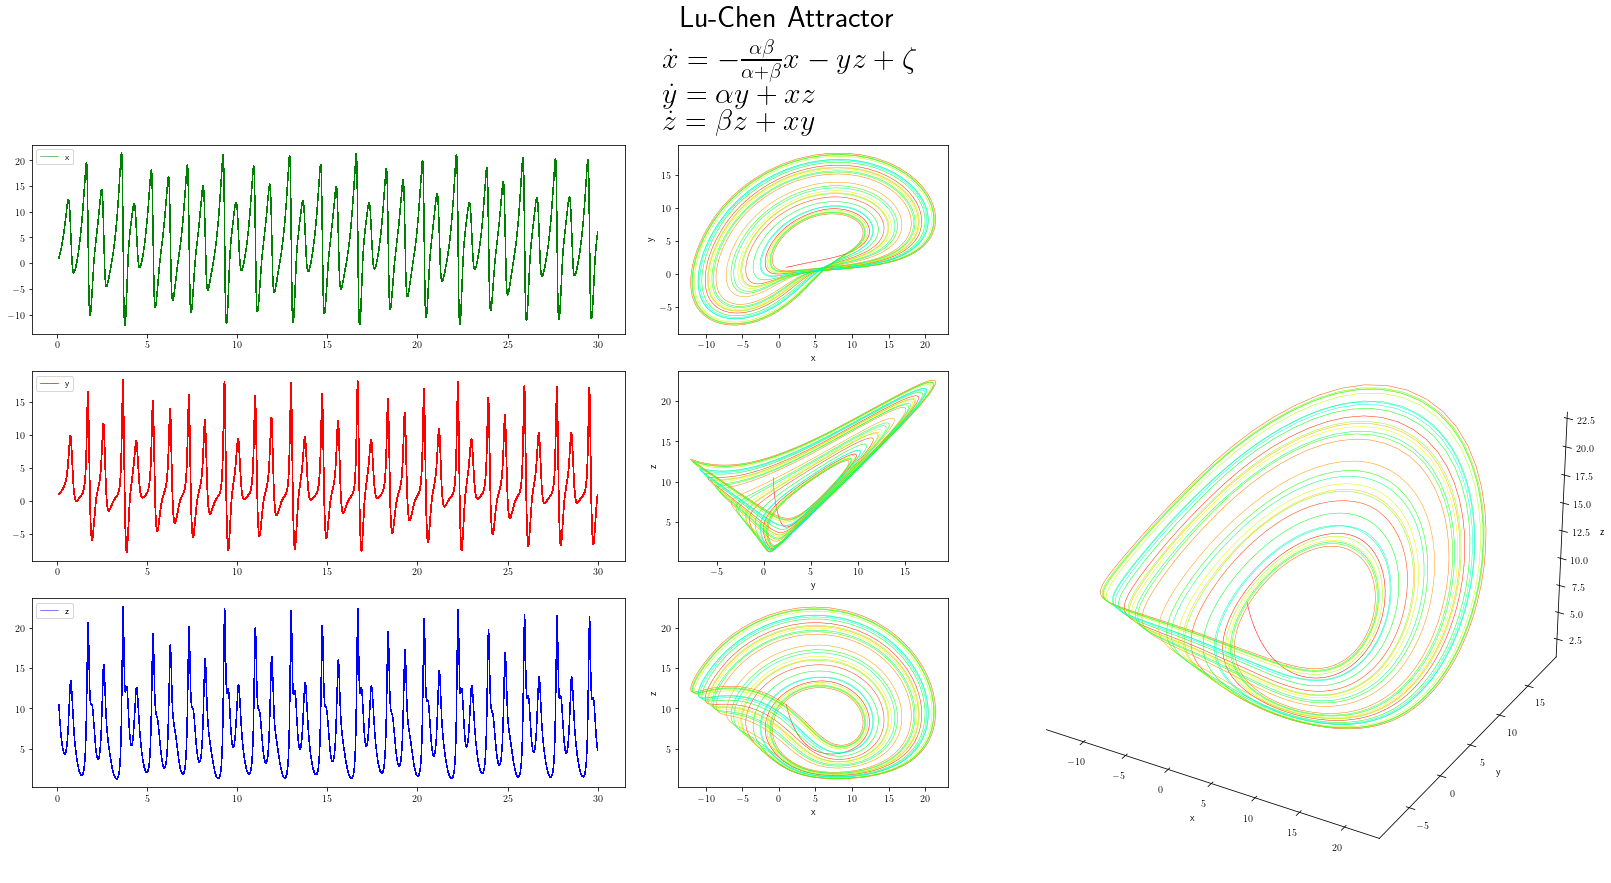

In [53]:
def my_lu_chen(t, S, alpha, beta, zeta):
    x,y,z=S
    dx=-alpha*beta*x/(alpha+beta) - y*z + zeta
    dy=alpha*y + x*z
    dz=beta*z + x*y
    dS=np.array([dx,dy,dz])
    return dS

alpha = -10
beta = -4
zeta = 18.1
const=(alpha, beta, zeta)

t0 = 0.1
tf = 30
s0 = np.array([1, 1, 10.5])
my_plot(my_lu_chen,const,s0,t0,tf,'Lu-Chen Attractor',
        r'$ \\ \dot{x}= -\frac{\alpha\beta}{\alpha+\beta} x-yz+\zeta $'+
        r'$ \\ \dot{y}= \alpha y+xz \\ \dot{z}=\beta z + xy $')

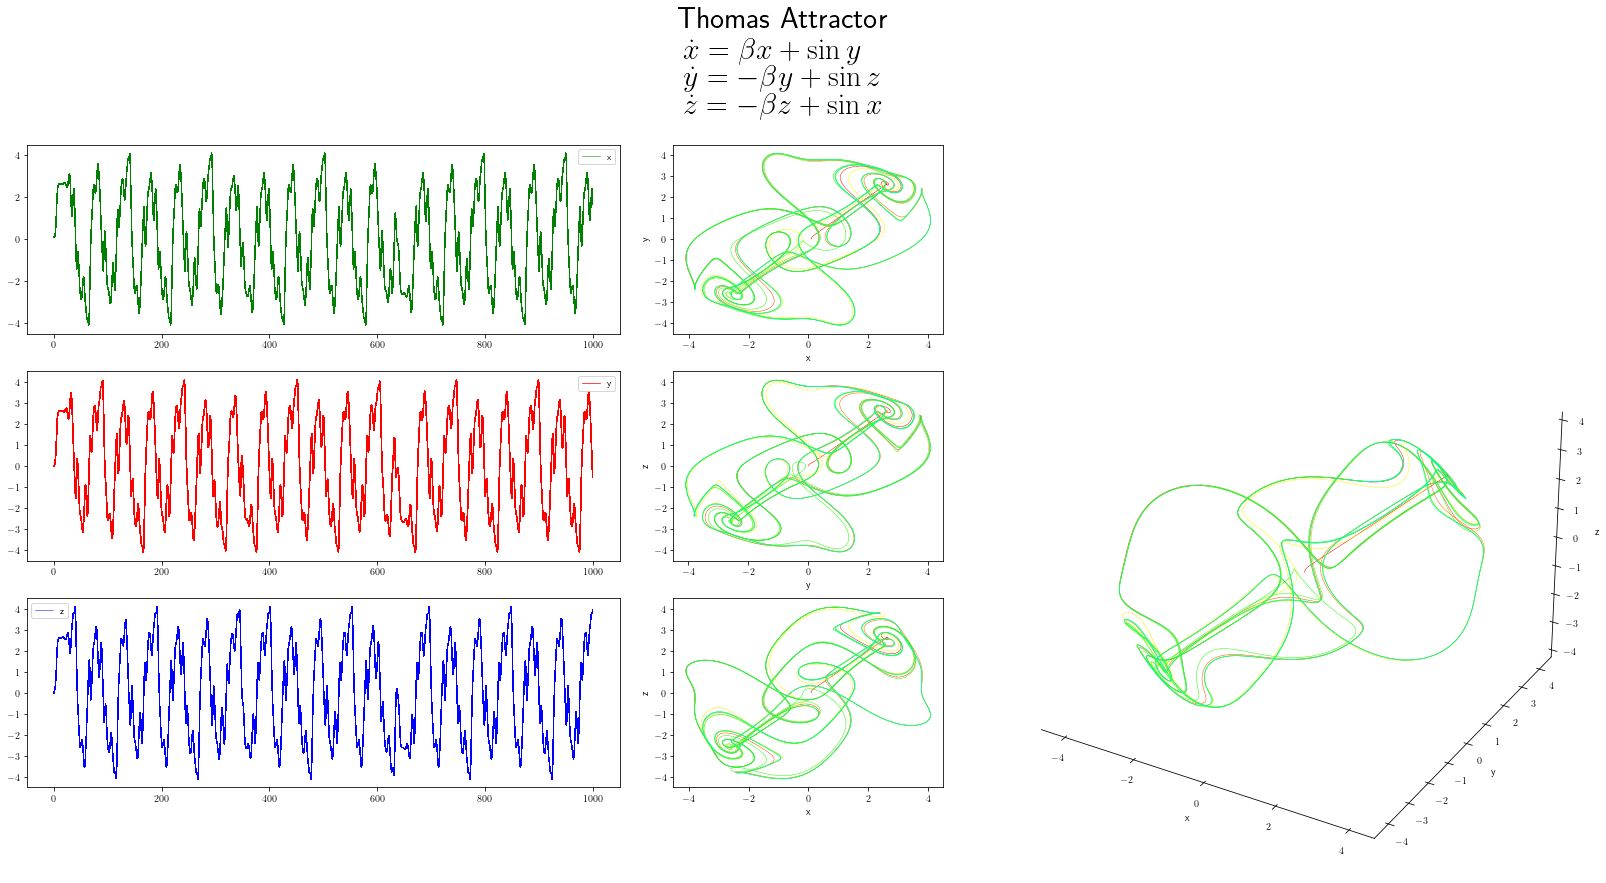

In [51]:
def my_thomas(t, S, beta):
    x,y,z=S
    dx =-beta*x + np.sin(y)
    dy =-beta*y + np.sin(z)
    dz =-beta*z + np.sin(x) 
    dS = np.array([dx,dy,dz])
    return dS

beta = 0.19
const=(beta,)

t0 = 0.05
tf = 1000
s0 = np.array([0.1, 0, 0])
my_plot(my_thomas,const,s0,t0,tf,'Thomas Attractor',
 r'$ \\ \dot{x}= \beta x + \sin y \\ \dot{y}= -\beta y + \sin z \\ \dot{z}= -\beta z + \sin x $')